In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

from pyspark.sql import SparkSession
import pyspark.sql.functions as F

In [3]:
spark = (SparkSession
    .builder
    .appName("nycflights")
    .config("spark.sql.execution.arrow.pyspark.enabled", "true")
    .getOrCreate()
)

In [4]:
# Create Spark DataFrame 
from nycflights13 import flights as flights_pd
flights = spark.createDataFrame(flights_pd)

In [5]:
# Import spark-plot Matplotlib frontend
from spark_plot import mpl
mpl.set_defaults()

## Histogram

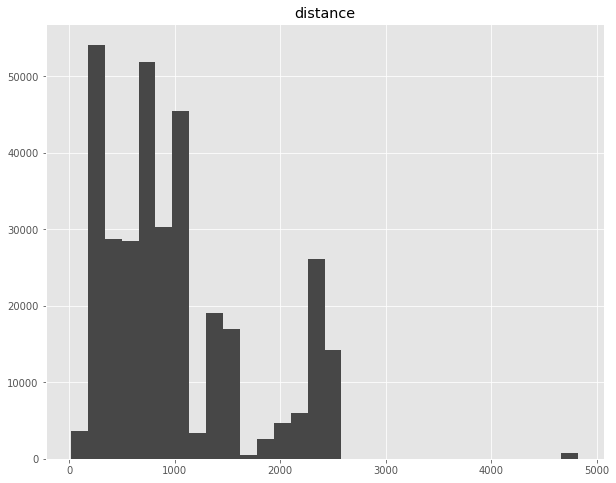

In [6]:
ax = mpl.hist(flights, "distance", bins=30, color="#474747")

In [7]:
# ax[0].get_figure().savefig("../docs/flights_hist.png")

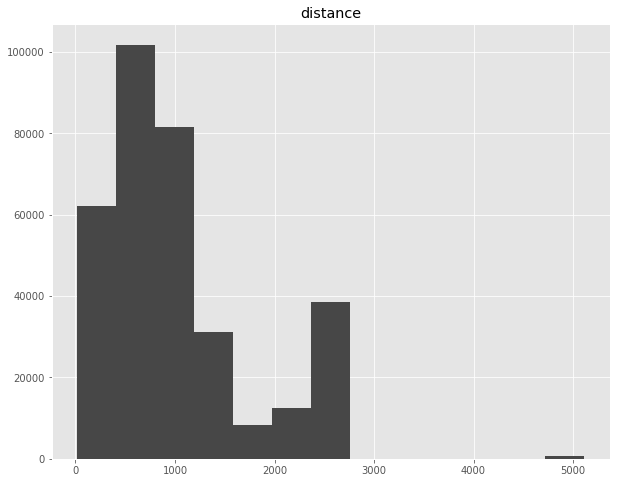

In [8]:
ax = mpl.hist(flights, "distance", bin_width=400, color="#474747")

In [9]:
# ax[0].get_figure().savefig("../docs/flights_hist_bin_width.png")

## Histogram 2D

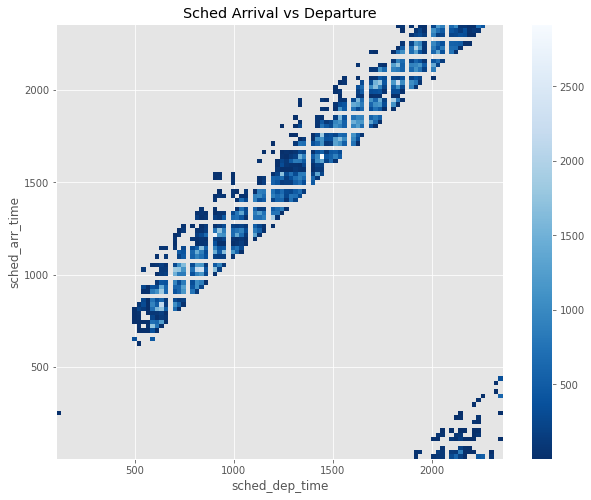

In [10]:
ax = mpl.hist2d(flights, col_x="sched_dep_time", col_y="sched_arr_time", title="Sched Arrival vs Departure", cmap="Blues_r")

In [11]:
# ax[0].get_figure().savefig("../docs/flights_hist2d.png")

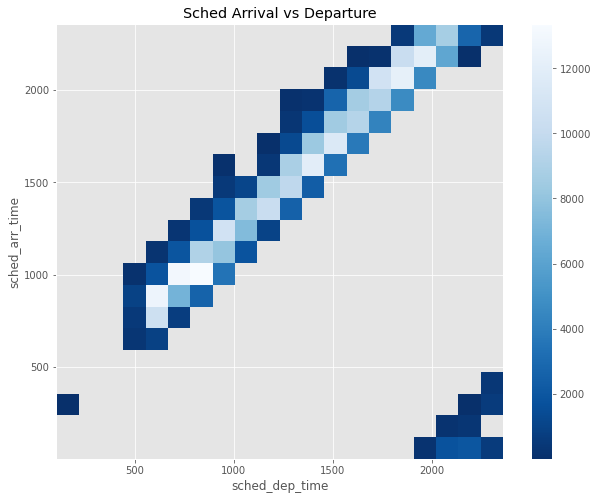

In [12]:
ax = mpl.hist2d(flights, col_x="sched_dep_time", col_y="sched_arr_time", title="Sched Arrival vs Departure", cmap="Blues_r", bins=20)

In [13]:
# ax[0].get_figure().savefig("../docs/flights_hist2d_bins.png")

## Bar plot

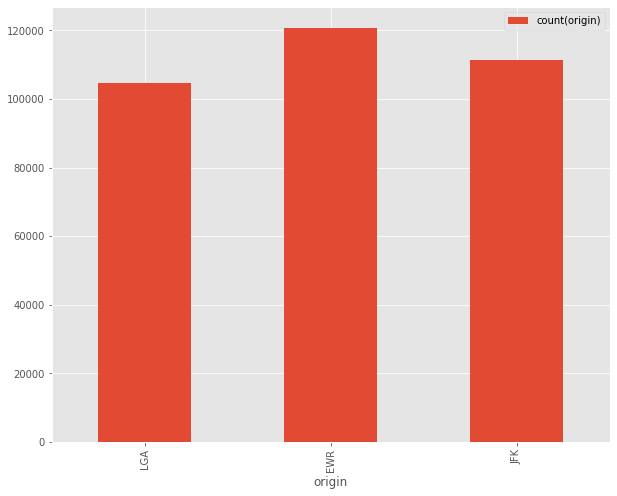

In [14]:
ax = mpl.bar(flights, x="origin")

In [15]:
# ax.get_figure().savefig("../docs/flights_bar_origin.png")

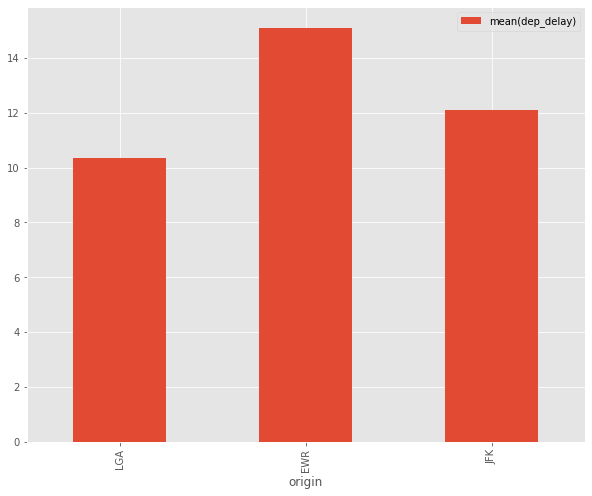

In [16]:
ax = mpl.bar(flights, x="origin", y="dep_delay", agg=F.mean)

In [17]:
# ax.get_figure().savefig("../docs/flights_bar_origin_depdelay.png")

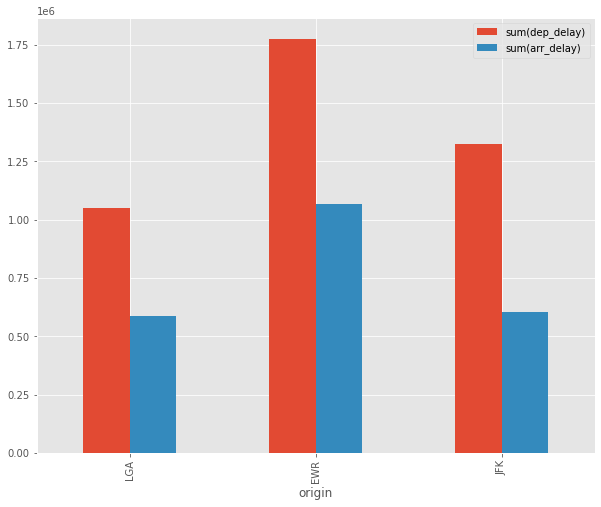

In [18]:
ax = mpl.bar(flights, x="origin", y=["dep_delay", "arr_delay"], agg=F.sum)

In [19]:
# ax.get_figure().savefig("../docs/flights_bar_origin_sum_delays.png")

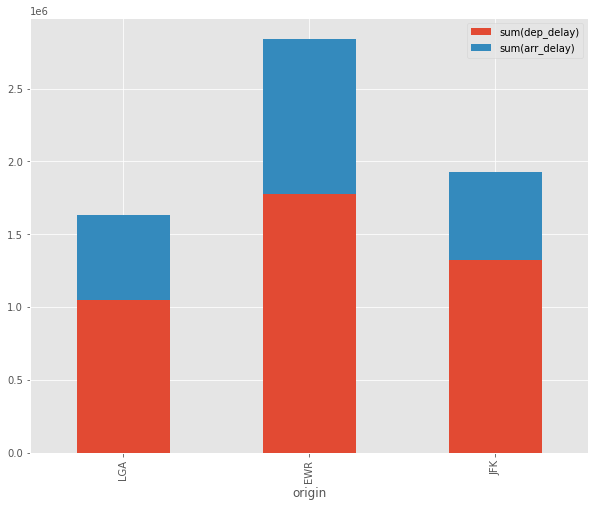

In [20]:
ax = mpl.bar(flights, x="origin", y=["dep_delay", "arr_delay"], agg=F.sum, stacked=True)

In [21]:
# ax.get_figure().savefig("../docs/flights_bar_origin_sum_delays_stack.png")

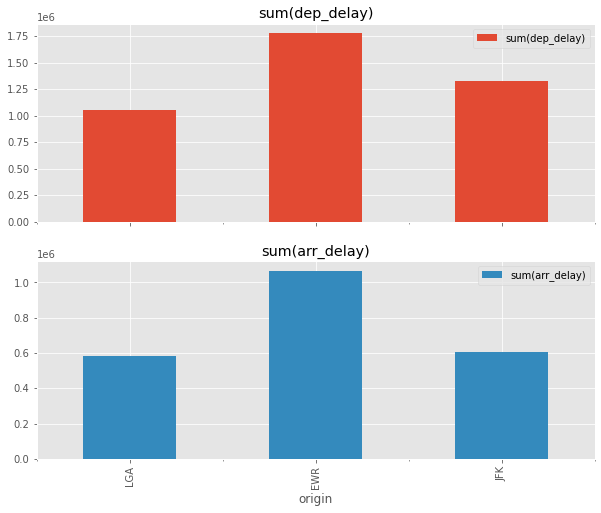

In [22]:
ax = mpl.bar(flights, x="origin", y=["dep_delay", "arr_delay"], agg=F.sum, subplots=True)